**DataScience HW-10**

• Perform NLP analysis on the following questions. Make sure to include interpretation of
each result including text/visualizations/tables to support your answer

1. Select any article on the website of your interest and perform Name Entity Relation
(NER) analysis on it. Show all the necessary output and visualization and explain
your findings. Also mention if you see any shortcoming or error in the algorithm
output.

**Named Entity Recognition (NER) Analysis**

In [2]:
import spacy
from spacy import displacy
import requests
from bs4 import BeautifulSoup
import pandas as pd


def url_to_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])
    return text

nlp = spacy.load("en_core_web_sm")

url = "https://www.automotive-technology.com/articles/regenerative-braking-systems"
text = url_to_text(url)

doc = nlp(text)

print([(X.text, X.label_) for X in doc.ents])


[('the past 10 years', 'DATE'), ('1', 'CARDINAL'), ('the past years', 'DATE'), ('2', 'CARDINAL'), ('The Basics of Regenerative Braking\nRegenerative', 'ORG'), ('EV', 'ORG'), ('the electric motor', 'ORG'), ('seventy percent', 'PERCENT'), ('3', 'CARDINAL'), ('Regenerative Braking Benefits EVs', 'ORG'), ('one', 'CARDINAL'), ('10-30%', 'PERCENT'), ('Improving Energy Efficiency\nDue', 'ORG'), ('EV', 'ORG'), ('4', 'CARDINAL'), ('The Types of Regenerative Braking Systems\nRegenerative', 'ORG'), ('two', 'CARDINAL'), ('the electric motor', 'ORG'), ('Parallel Regenerative Braking', 'WORK_OF_ART'), ('second', 'ORDINAL'), ('5', 'CARDINAL'), ('Regenerative Braking', 'NORP'), ('Limited Braking Power\nRegenerative', 'WORK_OF_ART'), ('Battery Health and Capacity', 'ORG'), ('EV', 'ORG'), ('6', 'CARDINAL'), ('The Future of Regenerative Braking', 'ORG'), ('7.', 'CARDINAL'), ('Regenerative Braking Impacts Driving Experience\n', 'ORG'), ('EV', 'ORG'), ('one', 'CARDINAL'), ('one', 'CARDINAL'), ('8', 'CARDIN

In [3]:
displacy.render(doc, style='ent', page=True)

**Shortcomings:**

It seems to be working good, but there are a few miss classifciations. For example, whenever the word 'EV' appears, it assings this word to 'ORG', which is incorrect, since EV (Electric Vehicles) are a type of vehicles and not an organization or a company. Apart from these few mistakes, its identifying most of the entities correctly.

2. Select any research paper of your interest and perform word frequency and keyword
extraction analysis. Use at least 3 different techniques/libraries. Show all the
necessary output and visualization and explain your findings. Compare different
techniques and mention if you see any shortcoming or error in the algorithm output.

In [4]:
import nltk
nltk.download('punkt_tab')

!pip install rake-nltk



[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Detected file encoding: MacRoman


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


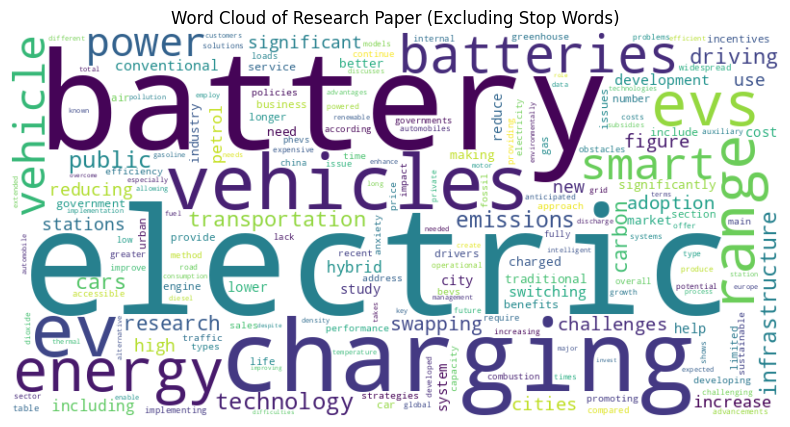

TF-IDF Keywords:
['batteries' 'battery' 'cars' 'charging' 'cities' 'electric' 'emissions'
 'energy' 'ev' 'evs' 'infrastructure' 'power' 'public' 'range' 'smart'
 'stations' 'technology' 'transportation' 'vehicle' 'vehicles']

RAKE Keywords:
['rbs ), electric vehicle producers may achieve low energy consumption', 'suitable energy management strategy may regulate energy use instead', 'dynamically building ev recharging infrastructure helps alleviate range anxiety', 'swapping station operator must continually modify charging', 'quick charges without suffering considerable power losses', 'enhancing ev charging procedures — battery switching stations', 'downloadkeyboard_arrow_down browse figures versions notes abstract', 'forecast “ real road ” driving energy consumption', 'balancing auxiliary loads auxiliary loads greatly impact', 'gmc hummer ev pickup edition 1', 'charging service providers would make significant investments', 'ev manufacturers even provide complimentary rental automobile

In [9]:
import chardet
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from nltk.corpus import stopwords
import nltk
from rake_nltk import Rake

file_path = "Electric Vehicles.txt"

raw_data = open(file_path, "rb").read()
result = chardet.detect(raw_data)
encoding = result["encoding"]
print(f"Detected file encoding: {encoding}")

with open(file_path, "r", encoding=encoding, errors="ignore") as file:
    text = file.read()

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

nltk_stopwords = set(stopwords.words("english"))
spacy_nlp = spacy.load("en_core_web_sm")

all_stopwords = nltk_stopwords.union(spacy_nlp.Defaults.stop_words)

words = [word.lower() for word in text.split() if word.isalpha() and word.lower() not in all_stopwords]
word_counts = Counter(words)

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Research Paper (Excluding Stop Words)")
plt.show()

vectorizer = TfidfVectorizer(max_features=20, stop_words="english")
X = vectorizer.fit_transform([text])
tfidf_keywords = vectorizer.get_feature_names_out()

print("TF-IDF Keywords:")
print(tfidf_keywords)

rake = Rake()
rake.extract_keywords_from_text(text)
rake_keywords = rake.get_ranked_phrases()[:20]

print("\nRAKE Keywords:")
print(rake_keywords)

doc = spacy_nlp(text)
spacy_keywords = [chunk.text for chunk in doc.noun_chunks if chunk.text.lower() not in all_stopwords][:20]

print("\nSpaCy Keywords:")
print(spacy_keywords)

print("\nComparison of Techniques:")
print(f"Word Cloud (Manual Frequency Count): Top {len(word_counts.most_common(10))} Words: {[word for word, _ in word_counts.most_common(10)]}")
print(f"TF-IDF: {tfidf_keywords}")
print(f"RAKE: {rake_keywords}")
print(f"SpaCy: {spacy_keywords}")


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform([text])
feature_names = tfidf.get_feature_names_out()

scores = tfidf_matrix.sum(axis=0).A1
word_score = [(word, score) for word, score in zip(feature_names, scores)]
sorted_word_score = sorted(word_score, key=lambda x: x[1], reverse=True)

for word, score in sorted_word_score[:10]:
    print(f"{word}: {score}")


electric: 0.4453479184622438
battery: 0.39527921757003887
vehicles: 0.31358817927223087
charging: 0.2529786992448249
ev: 0.24770830967722438
evs: 0.23716753054202333
batteries: 0.1686524661632166
range: 0.1554764922442153
energy: 0.15020610267661477
infrastructure: 0.11594857048721141


### **Comparison of Techniques**

TF-IDF effectively highlights key terms like "electric," "vehicles," and "charging" based on importance but struggles with multi-word phrases and variations like "vehicle" and "vehicles" due to the lack of stemming. RAKE excels at extracting descriptive phrases, such as "enhancing EV charging procedures," but often includes irrelevant or verbose outputs from formatting issues. SpaCy identifies meaningful concepts like "Electric Vehicles" and "Potential Solutions" but sometimes captures irrelevant or poorly parsed phrases, lacking a prioritization mechanism. Word Cloud provides a quick visual of frequent terms but does not consider contextual relevance or importance.

### **Shortcomings and Suggestions**

RAKE and SpaCy occasionally extract irrelevant content due to formatting or parsing errors. TF-IDF and Word Cloud rely solely on frequency, missing nuanced phrases. Preprocessing steps like stemming, lemmatization, and noise removal can improve all methods. Combining SpaCy's entity recognition with TF-IDF's scoring and RAKE's phrase extraction could yield more reliable and contextually rich results.

### **Conclusion**

While each technique has its strengths, an integrated approach addressing their individual weaknesses would provide a more robust keyword extraction process.

3. Choose any keyword or twitter handler (page/account) of your choice and pull/scrap
at least 20 (tweets) from Twitter. Manually put them in a text file. One tweet per line.

  a. Read the text file line by line.

  b. Perform Sentiment Analysis on the tweet and show total positive and negative
sentiment counts.

  c. Display one Positive and one Negative sentiment and discuss if the algorithm
is accurate.

In [11]:
!pip install textblob


In [21]:
from textblob import TextBlob

file_path = "tweets.rtf"

with open(file_path, "r") as file:

    content = file.read()
    tweets = content.split("/n")


sentiment_scores = []

for tweet in tweets:
    tweet = tweet.strip()

    if not tweet:
        continue

    analysis = TextBlob(tweet)
    polarity = analysis.sentiment.polarity

    sentiment_scores.append((tweet, polarity))

sentiment_scores.sort(key=lambda x: x[1])

most_negative_tweet = sentiment_scores[0][0]
second_negative_tweet = sentiment_scores[1][0]

most_positive_tweet = sentiment_scores[-1][0]
second_positive_tweet = sentiment_scores[-2][0]

positive_count = sum(1 for _, polarity in sentiment_scores if polarity > 0)
negative_count = sum(1 for _, polarity in sentiment_scores if polarity < 0)
neutral_count = sum(1 for _, polarity in sentiment_scores if polarity == 0)

print(f"Positive Sentiment Count: {positive_count}")
print(f"Negative Sentiment Count: {negative_count}")
print(f"Neutral Sentiment Count: {neutral_count}")

print("\nMost Positive Tweet:")
print(most_positive_tweet)

print("\nSecond Most Positive Tweet:")
print(second_positive_tweet)

print("\nMost Negative Tweet:")
print(most_negative_tweet)

print("\nSecond Most Negative Tweet:")
print(second_negative_tweet)


Positive Sentiment Count: 9
Negative Sentiment Count: 3
Neutral Sentiment Count: 9

Most Positive Tweet:
\
His sense of humor is amazing

Second Most Positive Tweet:
\
Wow, this needs to be greatly simplified @DOGE!

Most Negative Tweet:
\
This is insane

Second Most Negative Tweet:
\
This is crazy


**Discussion:**

Although TextBlob's sentiment analysis offers a decent approximation of sentiment, it has drawbacks, particularly when it comes to deciphering context, sarcasm, and domain-specific terminology. Although the instances of positive sentiment are largely correct, tweets that contain terms like "insane" or "crazy" may be incorrectly labeled because they depend on the context, as TextBlob solely examines word polarity without taking into account larger context. The need for more sophisticated models that can comprehend subtle sentiment and irony, such as BERT or RoBERTa, is highlighted by this. Sentiment analysis can be helpful, but human review and model improvement would increase its precision, particularly for unclear or complex tweets.

4. Pick any dataset and build recommendation engines using

  a. TF-IDF method

  b. Using word2vec (doc2vec) model (deep learning)

  c. Test both engines and compare the quality/accuracy of recommendations

**Note:**

The Dataset that I've used here is the IMDB 50k movie reviews dataset. Since 50,000 records were a bit too much for collab, I splitted the CSV into 5 differents CSVs, each containing 10,000 records. For this particular question, I have used the first one of those 5 CSVs.

**TF-IDF Recommendation**

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

file_path = 'IMDB Dataset-1.csv'
df = pd.read_csv(file_path)

reviews = df['review']

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_review(review):
    review = review.lower()

    review = ''.join([char for char in review if char not in string.punctuation])

    words = review.split()
    filtered_words = [stemmer.stem(word) for word in words if word not in stop_words]

    return ' '.join(filtered_words)

processed_reviews = reviews.apply(preprocess_review)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_reviews)

cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)

most_similar_review_idx = cosine_sim.argsort()[0][-2]
most_similar_review = reviews.iloc[most_similar_review_idx]

print(f"Most similar review using TF-IDF:\n{most_similar_review}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Most similar review using TF-IDF:
Oz is by far the best show ever to grace television. Better than The Sopranos, yes, ER, yes, CSI, absolutely. Uncompromising, daring, and utterly disturbing yet profoundly moving. Oz took us past any image of prison that anyone had ever conjured up on television. Tom Fontana truly did a brilliant job with the writing. No topic is taboo. Rape, drugs, murder. Oz is evidence of just how good TV can be. It follows characters of all different backgrounds and all different races, but always comes back to your everyman Tobias Beecher, in jail for vehicular manslaughter. We see what we don't want to see, pain, death, mayhem. Oz will disturb you, make you cringe, make you look away, but most of all it will make you think. To see Oz is to see a truly magnificent television production


**Word2Vec (Doc2Vec) Recommendation**

In [9]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

file_path = 'IMDB Dataset-1.csv'
df = pd.read_csv(file_path)

reviews = df['review']

tokenized_reviews = [word_tokenize(review.lower()) for review in reviews]

model_w2v = Word2Vec(tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

first_review_tokens = tokenized_reviews[0]

first_review_vector = sum(model_w2v.wv[word] for word in first_review_tokens if word in model_w2v.wv) / len(first_review_tokens)

similarity_scores = []
for review in tokenized_reviews:
    review_vector = sum(model_w2v.wv[word] for word in review if word in model_w2v.wv) / len(review)
    similarity = model_w2v.wv.cosine_similarities(first_review_vector, [review_vector])[0]
    similarity_scores.append(similarity)


most_similar_review_w2v = reviews.iloc[similarity_scores.index(max(similarity_scores))]

print(f"Most similar review using Word2Vec:\n{most_similar_review_w2v}")


Most similar review using Word2Vec:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main 

**Comparison of Quality & Accuracy of Recommendations:**

The two recommendation methods, **TF-IDF** and **Word2Vec**, take different approaches to identifying similar reviews, each with its own advantages and drawbacks. TF-IDF operates by comparing word frequencies between the target review and others in the dataset. The most similar review produced by TF-IDF characterizes *Oz* as a show that is bold and emotionally resonant, highlighting its writing and the unsettling yet meaningful themes it explores. While this review is certainly pertinent, TF-IDF tends to focus on matching surface-level terms like "TV," "violence," and "Oz," without fully grasping the deeper context or thematic subtleties.

On the other hand, Word2Vec captures **contextual meaning** and the **semantic relationships** between words. The most similar review generated by Word2Vec highlights the harsh, unflinching portrayal of prison life and violence, which closely aligns with the tone and content of the original review. Word2Vec’s ability to understand the connections between words allows it to offer a more thematically accurate recommendation. It not only identifies commonly used words but also uncovers the deeper meanings behind them, making its recommendation more contextually relevant to the original review. Therefore, while both methods yield relevant suggestions, **Word2Vec** generally excels over TF-IDF in terms of capturing **contextual relevance** and **thematic accuracy**.